In [0]:
from google.colab import drive

In [3]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import networkx as nx
import scipy.io as scp
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# dataset link : "https://snap.stanford.edu/data/ca-GrQc.html"
file = open('/content/gdrive/My Drive/ComplexNetworks/ca-GrQc.txt', 'r')

FileNotFoundError: ignored

In [0]:
G = nx.Graph()
lines = file.readlines()
len(lines)

28984

In [0]:
line = lines[2].split()
num_nodes, num_edges = int(line[2]), int(line[4])
num_nodes, num_edges

(5242, 28980)

In [0]:
2*num_edges/(num_nodes*(num_nodes-1))

0.0021096829862802904

In [0]:
from tqdm import tqdm
for i in tqdm(range(4 , len(lines))):
    line = lines[i].split()
    G.add_edge(int(line[0]), int(line[1]))
#     GD.add_edge(int(line[0]), int(line[1]))
#     GD.add_edge(int(line[1]),int(line[0]))
# len(GD.edges())


100%|██████████| 28980/28980 [00:00<00:00, 288437.96it/s]


In [0]:
deg_cen = nx.algorithms.degree_centrality(G)


(array([1.196e+03, 1.114e+03, 7.750e+02, 4.970e+02, 2.990e+02, 0.000e+00,
        2.250e+02, 1.590e+02, 1.410e+02, 9.800e+01, 0.000e+00, 9.200e+01,
        6.600e+01, 4.600e+01, 5.800e+01, 0.000e+00, 3.800e+01, 4.800e+01,
        2.500e+01, 4.300e+01, 0.000e+00, 2.000e+01, 1.900e+01, 2.800e+01,
        1.600e+01, 0.000e+00, 1.200e+01, 4.400e+01, 8.000e+00, 8.000e+00,
        0.000e+00, 7.000e+00, 3.000e+00, 5.000e+00, 3.000e+00, 0.000e+00,
        8.000e+00, 9.000e+00, 3.000e+00, 9.000e+00, 0.000e+00, 3.700e+01,
        1.000e+00, 2.000e+00, 5.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 3.000e+00, 0.000e+00, 1.900e+01, 2.000e+00, 1.000e+00,
        1.300e+01, 0.000e+00, 2.000e+00, 4.000e+00, 3.000e+00, 0.000e+00,
        4.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+0

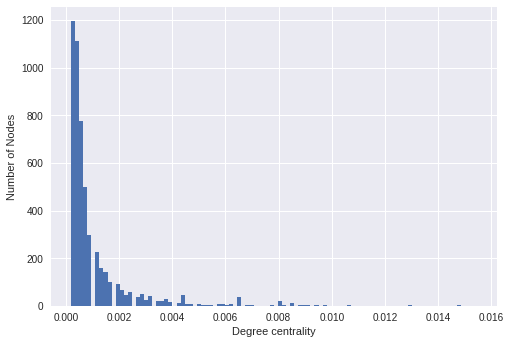

In [0]:
plt.xlabel('Degree centrality')
plt.ylabel('Number of Nodes')
plt.hist(deg_cen.values(),bins=100)

In [0]:
deg_dist = {}
for i in G.nodes() :
  if G.degree[i] in deg_dist.keys() :
    deg_dist[G.degree[i]] += 1
  else :
    deg_dist[G.degree[i]] = 1
# plt.plot(deg_dist.keys(),deg_dist.values(), 'ro')
# plt.yscale('log')
# plt.xscale('log')
# plt.xlabel('degree(in log)')
# plt.ylabel('Number of nodes(in log)')
# plt.grid(True)
# plt.show()      


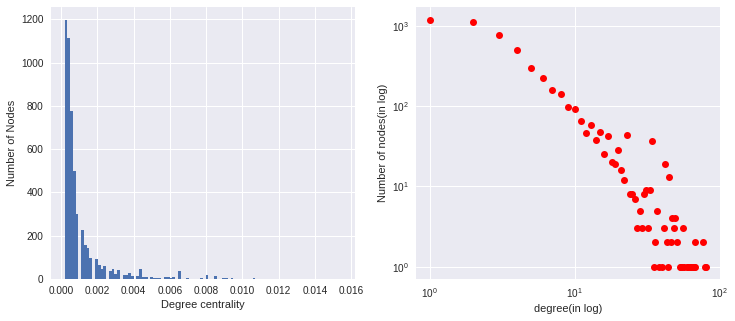

In [0]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.xlabel('Degree centrality')
plt.ylabel('Number of Nodes')
plt.hist(deg_cen.values(),bins=100)

plt.subplot(122)
plt.plot(deg_dist.keys(),deg_dist.values(), 'ro')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('degree(in log)')
plt.ylabel('Number of nodes(in log)')
plt.grid(True)
plt.show()     


In [0]:
sorted_deg = sorted(deg_cen.items(),key = lambda x :x[0],reverse = False)
sorted_deg = [i[1] for i in sorted_deg]
mu = np.mean(sorted_deg)
sig = np.std(sorted_deg)
sorted_deg = (sorted_deg - mu)/sig

In [0]:
bet_cen = nx.algorithms.betweenness_centrality(G)




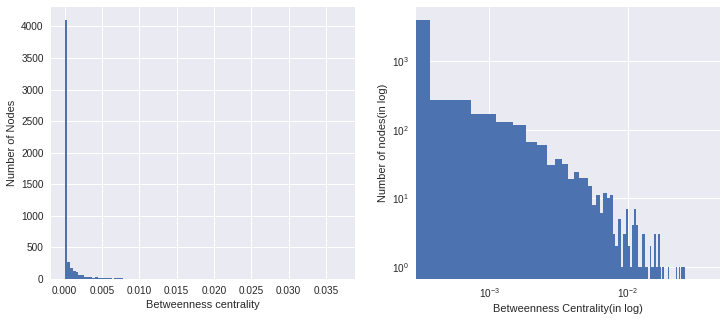

In [0]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.xlabel('Betweenness centrality')
plt.ylabel('Number of Nodes')
plt.hist(list(bet_cen.values()),bins=100)

plt.subplot(122)
plt.hist(list(bet_cen.values()),bins=100)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Betweenness Centrality(in log)')
plt.ylabel('Number of nodes(in log)')

plt.show()


In [0]:
sorted_bet = sorted(bet_cen.items(),key = lambda x :x[0],reverse = False)
sorted_bet = [i[1] for i in sorted_bet]
mu = np.mean(sorted_bet)
sig = np.std(sorted_bet)
sorted_bet = (sorted_bet - mu)/sig
np.corrcoef(sorted_bet,sorted_deg)

array([[1.        , 0.50395169],
       [0.50395169, 1.        ]])

In [0]:
count =0
for i in G.nodes():
  if sorted_deg[i]<sorted_bet[i] :
    count +=1
count

591

In [0]:
close_cen = nx.algorithms.closeness_centrality(G)

In [0]:
# import operator
sorted_close = sorted(close_cen.items(),key = lambda x :x[0],reverse = False)

In [0]:
sorted_close = [i[1] for i in sorted_close]
mu = np.mean(sorted_close)
sig = np.std(sorted_close)
sorted_close = (sorted_close - mu)/sig

In [0]:
np.corrcoef(sorted_close,sorted_deg)

array([[1.        , 0.34448929],
       [0.34448929, 1.        ]])

(array([1.196e+03, 1.114e+03, 7.750e+02, 4.970e+02, 2.990e+02, 0.000e+00,
        2.250e+02, 1.590e+02, 1.410e+02, 9.800e+01, 0.000e+00, 9.200e+01,
        6.600e+01, 4.600e+01, 5.800e+01, 0.000e+00, 3.800e+01, 4.800e+01,
        2.500e+01, 4.300e+01, 0.000e+00, 2.000e+01, 1.900e+01, 2.800e+01,
        1.600e+01, 0.000e+00, 1.200e+01, 4.400e+01, 8.000e+00, 8.000e+00,
        0.000e+00, 7.000e+00, 3.000e+00, 5.000e+00, 3.000e+00, 0.000e+00,
        8.000e+00, 9.000e+00, 3.000e+00, 9.000e+00, 0.000e+00, 3.700e+01,
        1.000e+00, 2.000e+00, 5.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 3.000e+00, 0.000e+00, 1.900e+01, 2.000e+00, 1.000e+00,
        1.300e+01, 0.000e+00, 2.000e+00, 4.000e+00, 3.000e+00, 0.000e+00,
        4.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+0

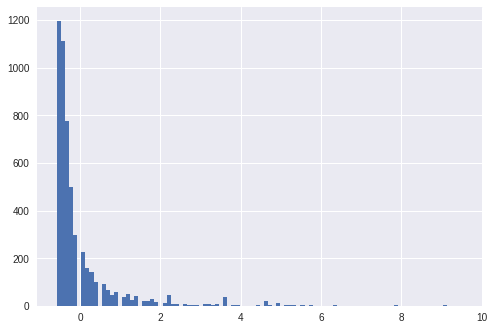

In [0]:
plt.hist(sorted_deg,bins=100)

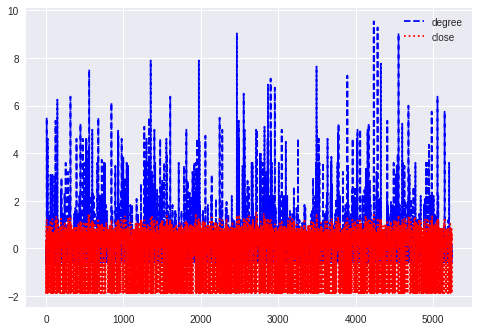

In [0]:
plt.plot(sorted_deg,'b--', label = 'degree')
plt.plot(sorted_close,'r:', label = 'close')
plt.legend(loc = 'best')
plt.show()

In [0]:
deg_dist = [i[1] for i in list(G.degree())]
print(deg_dist[:10])

[8, 5, 2, 5, 13, 10, 17, 3, 4, 8]


In [0]:
# plt.hist(deg_dist, bins = 100, histtype = 'stepfilled', log = True)
freq = np.bincount(deg_dist)

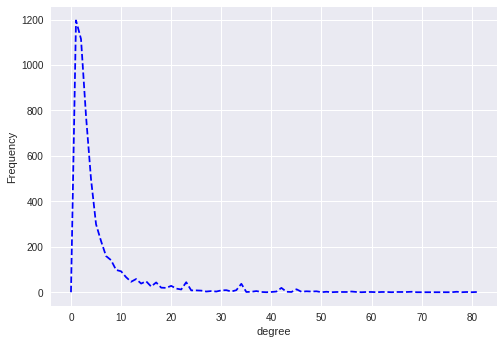

In [0]:
fig = plt.figure()
plt.plot(freq, 'b--')
plt.xlabel('degree')
plt.ylabel('Frequency')
plt.savefig('/content/gdrive/My Drive/ComplexNetworks/deg_dist.png')

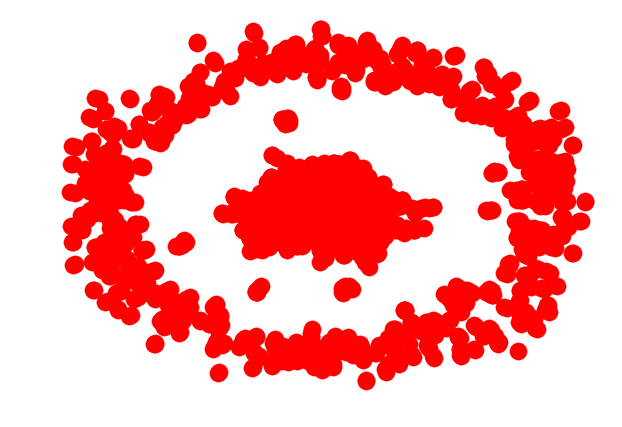

In [0]:
nx.draw(G,pos=nx.spring_layout(G))

In [0]:
gcn = nx.graph_clique_number(G)
gcn

44

In [0]:
cliques = nx.find_cliques(G)
# for i in cliques:
#   #if(len(i)==44):
#   print(i + str(i))

In [0]:
clique_size = {}
for x in cliques:
  i = [i for i in x]
  if(len(i) in clique_size):
    clique_size[len(i)]+=1
  else:
    clique_size[len(i)]=1

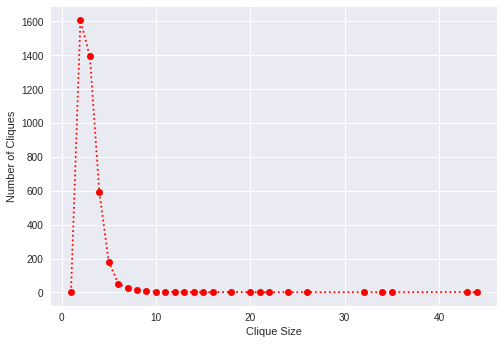

In [0]:
sorted_clique = sorted(clique_size.items(),key = lambda x :x[0],reverse = False)
plt.figure()
plt.xlabel('Clique Size')
plt.ylabel('Number of Cliques')
plt.plot([i[0] for i in sorted_clique], [i[1] for i in sorted_clique], 'ro:')

In [0]:
num_components = nx.number_connected_components(G)
num_components

355

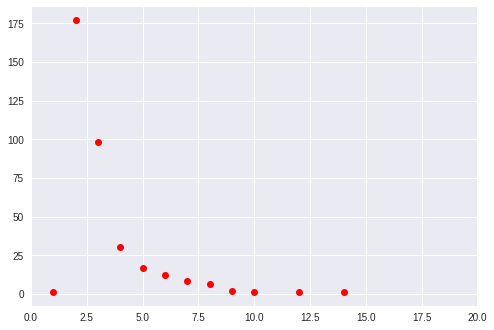

In [0]:
components = nx.connected_components(G)
components
comp_size = {}
dia = []

for i in components:
  #dia.append(nx.algorithms.diameter(G.subgraph(i),e=None))
  if len(i) in comp_size.keys() :
    comp_size[len(i)] +=1
  else :
    comp_size[len(i)] =1
plt.xlim((0,20))
plt.plot(comp_size.keys(),comp_size.values(),'ro')

#plt.xlim((3800,4500))
# plt.ylim((0,2))
# plt.plot(comp_size.keys(),comp_size.values(),'ro')

In [0]:
comp_size[2]

177

In [0]:
# nx.number_of_selfloops(G)
for i in nx.selfloop_edges(G):
  G.remove_edge(i[0],i[1])

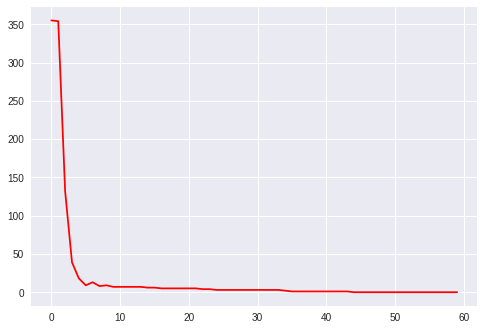

In [0]:
kcore = {}
#G = G.remove_edges_from(nx.selfloop_edges(G))
for i in range(0,60):
  GS = nx.k_core(G,k=i)
  
#   GS.remove_edges_from(GS.selfloop_edges())
  kcore[i] = nx.number_connected_components(GS)
#plt.ylim((0,30))
plt.plot(kcore.keys(),kcore.values(),'r')


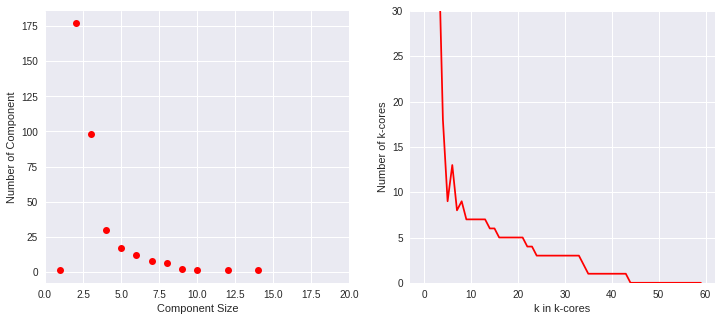

In [0]:
plt.figure(figsize = (12,5))
plt.subplot(121)
plt.xlim((0,20))
plt.xlabel('Component Size')
plt.ylabel('Number of Component')
plt.plot(comp_size.keys(),comp_size.values(),'ro')

plt.subplot(122)
plt.ylim((0,30))
plt.xlabel('k in k-cores')
plt.ylabel('Number of k-cores')
plt.plot(kcore.keys(),kcore.values(),'r')
plt.show()


(array([178., 102.,  33.,  25.,  15.,  13.,   9.,   7.,   3.,   3.,   3.,
          1.,   2.,   2.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,
          0.,   1.,   2.,   0.,   2.,   0.,   1.,   0.,   0.,   1.,   0.,
          1.,   1.,   0.,   1.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

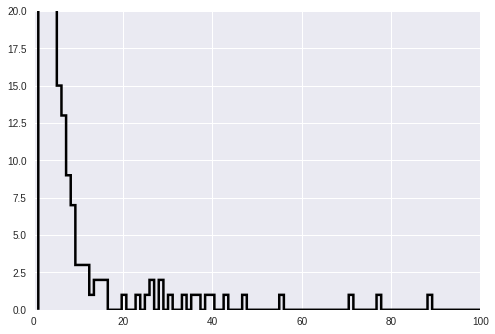

In [0]:
c = (nx.algorithms.community.greedy_modularity_communities(G))
community = []
for x in c:
  community.append(len(x))
plt.ylim((0,20))
plt.xlim((0,100))
plt.hist(community,bins=1000,histtype='step',color='black',linewidth=2.5)
  

In [0]:
np.max(community)

1039

In [0]:
avg_density = {}
num_cc ={}

for i in range(1,100):
  GS = nx.k_core(G,k=i)
  CC= nx.connected_components(GS)
  density = 0 
  length = 0;
  covered_nodes = []
  for x in CC :
    length +=1
    y=[y for y in x]
    H = GS.subgraph(y)
    e=len(H.edges())
    covered_nodes.extend(list(H.nodes()))
    n=len(H.nodes())
    density += (2*e/(n*(n-1)))
  covered_nodes = set(covered_nodes)
  if (length != 0) :
    density = (density/length)*(len(covered_nodes)/num_nodes)
  avg_density[i] = density
  num_cc[i]=length
  
len(avg_density)

99

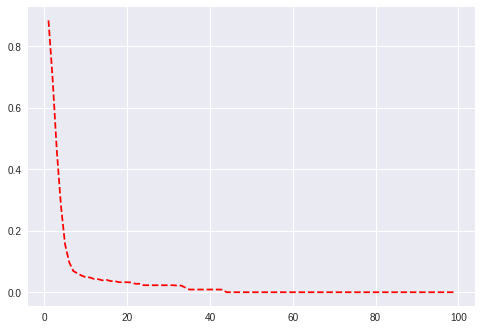

In [0]:

plt.plot(avg_density.keys(),avg_density.values(),'r--')

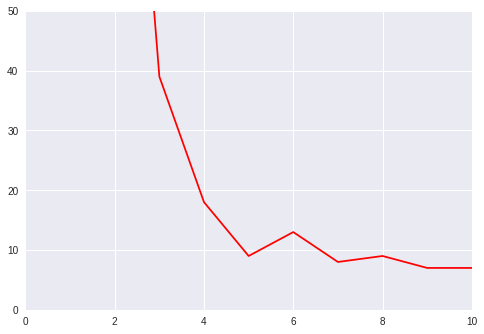

In [0]:
plt.xlim((0,10))
plt.ylim((0,50))
plt.plot(num_cc.keys(),num_cc.values(),'r')

In [0]:
sorted(avg_density.items(),key = lambda x :x[1],reverse = True)

[(1, 0.8847570070765882),
 (2, 0.6942672673417711),
 (3, 0.4625814487489209),
 (4, 0.2824967764418408),
 (5, 0.15583470263154775),
 (6, 0.09754284865338997),
 (7, 0.06896508778252733),
 (8, 0.06126041586231083),
 (9, 0.05416712133387161),
 (10, 0.048724302183802),
 (11, 0.048036094955338796),
 (12, 0.04305065977498031),
 (13, 0.04241002366257471),
 (15, 0.040071513437593236),
 (14, 0.03870623865275952),
 (16, 0.036233677995780235),
 (17, 0.036233677995780235),
 (18, 0.03258637884072207),
 (19, 0.03258637884072207),
 (20, 0.03245992209830728),
 (21, 0.03170230419341106),
 (22, 0.027441191661965847),
 (23, 0.027441191661965847),
 (24, 0.022769993761082692),
 (25, 0.022769993761082692),
 (26, 0.022699810865628757),
 (27, 0.022699810865628757),
 (28, 0.022699810865628757),
 (29, 0.022699810865628757),
 (30, 0.022699810865628757),
 (31, 0.022699810865628757),
 (32, 0.02190286432941908),
 (33, 0.02190286432941908),
 (34, 0.015414793557055887),
 (35, 0.008732883971342574),
 (36, 0.00873288397

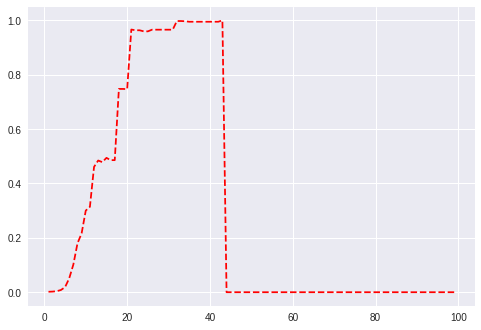

In [0]:
density = {}
for i in range(1,100):
  GS = nx.k_core(G,k=i)
  CC= nx.connected_components(GS)
  num_edges = 0 
  max_edges = 0;
  length = 0;
  for x in CC :
    length +=1
    y=[y for y in x]
    H = GS.subgraph(y)
    num_edges+=len(H.edges())
    max_edges+=((len(H.nodes())*(len(H.nodes())-1))/2)
  den = 0
  if (max_edges != 0 ) :
    den = num_edges/max_edges
  density[i] = den
plt.plot(density.keys(),density.values(),'r--')

In [0]:
eigen_cen = nx.algorithms.centrality.eigenvector_centrality(G)
sorted_eigen = sorted(eigen_cen.items(),key = lambda x :x[0],reverse = False)
sorted_eigen = [i[1] for i in sorted_eigen]
mu = np.mean(sorted_eigen)
sig = np.std(sorted_eigen)
sorted_eigen = (sorted_eigen - mu)/sig


In [0]:
np.corrcoef(sorted_eigen,sorted_deg)

array([[1.        , 0.59554405],
       [0.59554405, 1.        ]])

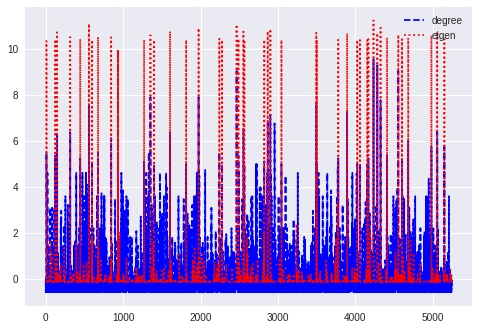

In [0]:
plt.plot(sorted_deg,'b--', label = 'degree')
plt.plot(sorted_eigen,'r:', label = 'eigen')
#plt.xlim((500,1000))
plt.legend(loc = 'best')
plt.show()

In [0]:
pearson_coeff = np.cov(sorted_deg,sorted_eigen)/(np.cov(sorted_deg,sorted_deg)*np.cov(sorted_eigen,sorted_eigen))
pearson_coeff

array([[0.99980923, 0.59542981],
       [0.59542981, 0.99980923]])

In [0]:
nx.algorithms.degree_pearson_correlation_coefficient(G)

0.6593246242993968

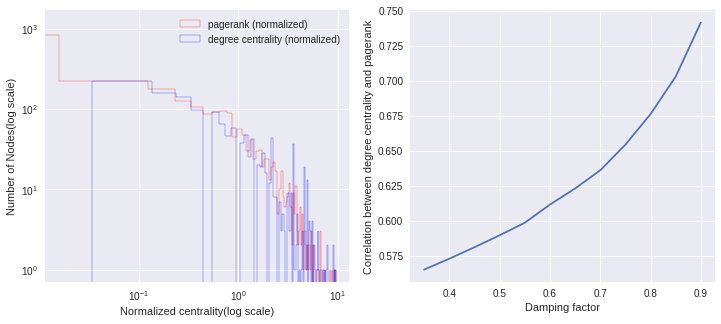

In [0]:

pr=nx.pagerank(G,max_iter =2000)
plt.figure(figsize = (12,5))

pagerank = list(pr.values())
mu=np.mean(pagerank)
sig=np.std(pagerank)
pagerank=(pagerank-mu)/sig


degcen = list(deg_cen.values())
mu=np.mean(degcen)
sig=np.std(degcen)
degcen=(degcen-mu)/sig

plt.subplot(121)
plt.xscale('log')
plt.yscale('log')
plt.hist(pagerank,bins=100,histtype='step',color='red',label='pagerank (normalized)')
plt.hist(degcen,bins=100,histtype='step',color='blue',label='degree centrality (normalized)')
plt.legend(loc='best')
plt.xlabel('Normalized centrality(log scale)')
plt.ylabel('Number of Nodes(log scale)')
sorted_pr = sorted(pr.items(),key = lambda x :x[0],reverse = False)
sorted_pr = [i[1] for i in sorted_pr]
mu = np.mean(sorted_pr)
sig = np.std(sorted_pr)
sorted_pr = (sorted_pr - mu)/sig
np.corrcoef(sorted_pr,sorted_deg)


corre_list = []
for alpha in np.arange(0.35,0.95,0.05):
  pr=nx.pagerank(G,alpha=alpha,max_iter =2000)
 
  
  pagerank = list(pr.values())
  mu=np.mean(pagerank)
  sig=np.std(pagerank)
  pagerank=(pagerank-mu)/sig
  degcen = list(deg_cen.values())
  mu=np.mean(degcen)
  sig=np.std(degcen)
  degcen=(degcen-mu)/sig
  sorted_pr = sorted(pr.items(),key = lambda x :x[0],reverse = False)
  sorted_pr = [i[1] for i in sorted_pr]
  mu = np.mean(sorted_pr)
  sig = np.std(sorted_pr)
  sorted_pr = (sorted_pr - mu)/sig
  corre_list.append(np.corrcoef(sorted_pr,sorted_deg)[0][1])
plt.subplot(122)
plt.xlabel('Damping factor')
plt.ylabel('Correlation between degree centrality and pagerank')
plt.plot(np.arange(0.35,0.95,0.05),corre_list)
plt.show()



In [0]:
print(cp,cd)

1748 885


In [0]:
inDeg = {}
outDeg = {}
for i in range(0,num_nodes) :
  inDeg[i] = 0
  outDeg[i] = 0;
for i in tqdm(range(4 , len(lines))):
    line = lines[i].split()
    G.add_edge(int(line[0]), int(line[1]))
    if int(line[1]) in inDeg.keys() :
      inDeg[int(line[1])] += 1
    if int(line[0]) in outDeg.keys() :
      outDeg[int(line[0])] += 1
    
    
     

100%|██████████| 147892/147892 [00:00<00:00, 194430.85it/s]


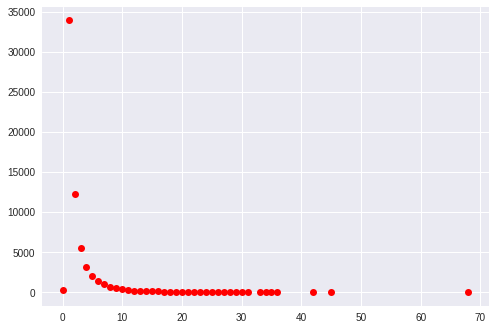

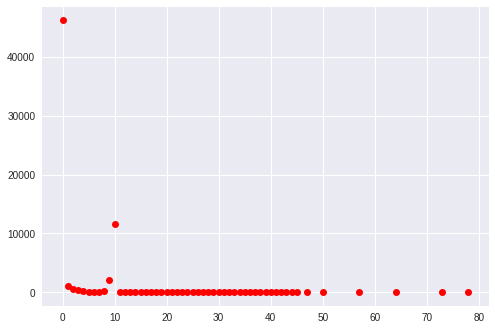

In [0]:
inDeg_dist = {}
outDeg_dist = {}
for i in range(len(inDeg)) :
  if inDeg[i] in inDeg_dist.keys() :
    inDeg_dist[inDeg[i]] += 1
  else :
    inDeg_dist[inDeg[i]] = 1
  if outDeg[i] in outDeg_dist.keys() :
    outDeg_dist[outDeg[i]] += 1
  else :
    outDeg_dist[outDeg[i]] = 1
plt.plot(inDeg_dist.keys(),inDeg_dist.values(), 'ro')
#plt.axis([0, 100, 0, 10])
plt.show()      
plt.plot(outDeg_dist.keys(),outDeg_dist.values(), 'ro')

plt.show()

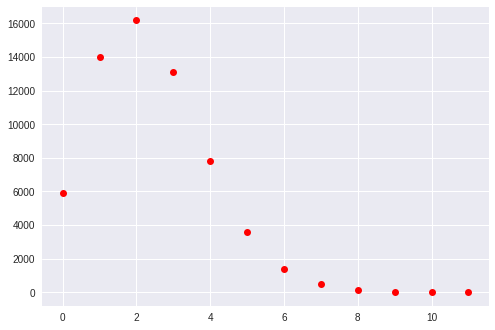

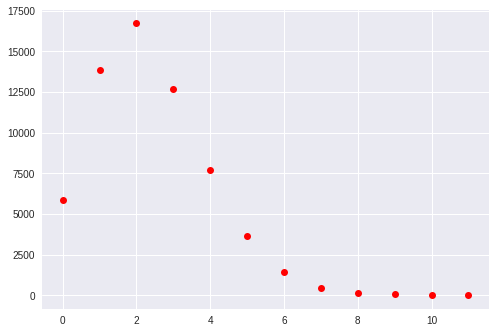

In [0]:
RG = nx.fast_gnp_random_graph(num_nodes,num_edges/(num_nodes*(num_nodes-1)),seed = None,directed = True)
RinDeg_dist = {}
RoutDeg_dist = {}
for i in range(0,num_nodes) :
  if RG.in_degree(i) in RinDeg_dist.keys() :
    RinDeg_dist[RG.in_degree(i)] += 1
  else :
    RinDeg_dist[RG.in_degree(i)] = 1
  if RG.out_degree(i) in RoutDeg_dist.keys() :
    RoutDeg_dist[RG.out_degree(i)] += 1
  else :
    RoutDeg_dist[RG.out_degree(i)] = 1
plt.plot(RinDeg_dist.keys(),RinDeg_dist.values(), 'ro')
#plt.axis([0, 100, 0, 10])
plt.show()      
plt.plot(RoutDeg_dist.keys(),RoutDeg_dist.values(), 'ro')

plt.show()



In [0]:
RinDeg_dist

{0: 5936,
 1: 13849,
 2: 16437,
 3: 13001,
 4: 7729,
 5: 3585,
 6: 1397,
 7: 475,
 8: 137,
 9: 27,
 10: 8,
 11: 3,
 12: 2}

In [0]:
RoutDeg_dist

{0: 5850,
 1: 13952,
 2: 16502,
 3: 12919,
 4: 7716,
 5: 3604,
 6: 1391,
 7: 472,
 8: 133,
 9: 35,
 10: 9,
 11: 2,
 12: 1}

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


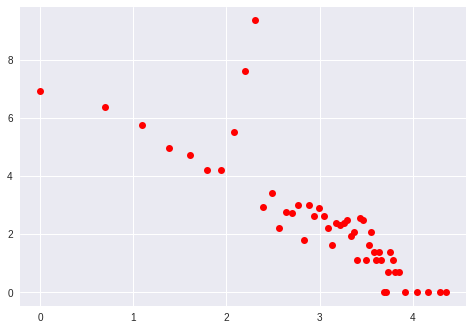

In [0]:
out_deg = list(outDeg_dist.keys())
out_deg_frq = list(outDeg_dist.values())
plt.plot(np.log(out_deg),np.log(out_deg_frq), 'ro')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


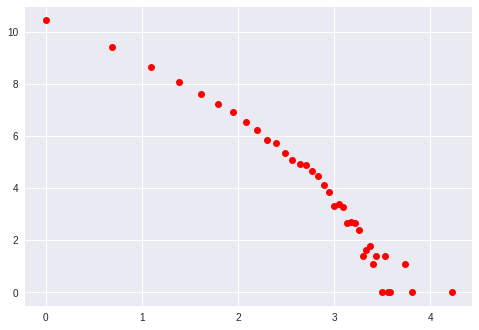

In [0]:
in_deg = list(inDeg_dist.keys())
in_deg_frq = list(inDeg_dist.values())
plt.plot(np.log(in_deg),np.log(in_deg_frq), 'ro')

In [0]:
clust = nx.algorithms.clustering(G)

In [0]:
clust

{0: 0,
 1: 0.002380952380952381,
 2: 0,
 3: 0.0031746031746031746,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 5717: 0,
 17005: 0,
 19631: 0,
 19632: 0,
 20269: 0,
 20477: 0.017857142857142856,
 20478: 0,
 20777: 0,
 21041: 0,
 23317: 0,
 991: 0,
 1374: 0,
 1929: 0,
 1930: 0,
 1931: 0,
 1932: 0,
 1933: 0,
 1934: 0,
 1935: 0,
 1936: 0,
 307: 0,
 1825: 0,
 3114: 0,
 3392: 0,
 3393: 0,
 3394: 0,
 3395: 0.007575757575757576,
 3396: 0,
 3397: 0,
 3398: 0,
 317: 0,
 839: 0,
 840: 0,
 841: 0,
 842: 0,
 843: 0,
 844: 0,
 845: 0,
 846: 0,
 4363: 0.08333333333333333,
 7003: 0,
 11234: 0,
 15666: 0,
 18435: 0,
 18436: 0,
 18437: 0,
 18438: 0,
 18439: 0,
 18440: 0,
 684: 0,
 686: 0,
 688: 0,
 958: 0,
 2691: 0,
 2873: 0,
 3075: 0,
 5577: 0.0032679738562091504,
 5578: 0,
 10085: 0,
 19: 0,
 1089: 0,
 1090: 0,
 1091: 0,
 1092: 0.0005807200929152149,
 1093: 0,
 1094: 0,
 1095: 0,
 1096: 0,
 1097: 0,
 6584: 0,
 10563: 0,
 12625: 0,
 12626: 0,
 12627: 0,
 12628: 0,
 12629: 0,
 12630: 0,
 12631: 0

In [0]:
bet_cen = nx.algorithms.betweenness_centrality(G)

In [0]:
!pip install mayavi

    100% |████████████████████████████████| 7.0MB 5.6MB/s 
    100% |████████████████████████████████| 245kB 26.4MB/s 
    100% |████████████████████████████████| 378kB 24.0MB/s 
    100% |████████████████████████████████| 5.2MB 6.7MB/s 
    100% |████████████████████████████████| 358kB 25.0MB/s 
    100% |████████████████████████████████| 5.1MB 7.3MB/s 
    100% |████████████████████████████████| 48.9MB 913kB/s 
  Running setup.py bdist_wheel for mayavi ... - error
  Complete output from command /usr/bin/python3 -u -c "import setuptools, tokenize;__file__='/tmp/pip-install-wbuszd43/mayavi/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d /tmp/pip-wheel-y9nhi2p7 --python-tag cp36:
  running bdist_wheel
  running build
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "/tmp/pip-install-wbuszd43/mayavi/setup.py", line 469, in <module>
      **conf

In [0]:
from enthought.mayavi import mlab

# some graphs to try
#H=nx.krackhardt_kite_graph()
#H=nx.Graph();H.add_edge('a','b');H.add_edge('a','c');H.add_edge('a','d')
#H=nx.grid_2d_graph(4,5)
#H=nx.cycle_graph(20)

# reorder nodes from 0,len(G)-1
H=nx.convert_node_labels_to_integers(G)
# 3d spring layout
pos=nx.spring_layout(H,dim=3)
# numpy array of x,y,z positions in sorted node order
xyz=np.array([pos[v] for v in sorted(H)])
# scalar colors
scalars=np.array(H.nodes())+5

mlab.figure(1, bgcolor=(0, 0, 0))
mlab.clf()

pts = mlab.points3d(xyz[:,0], xyz[:,1], xyz[:,2],
                    scalars,
                    scale_factor=0.1,
                    scale_mode='none',
                    colormap='Blues',
                    resolution=20)

pts.mlab_source.dataset.lines = np.array(H.edges())
tube = mlab.pipeline.tube(pts, tube_radius=0.01)
mlab.pipeline.surface(tube, color=(0.8, 0.8, 0.8))

mlab.savefig('/content/gdrive/My Drive/ComplexNetworks/mayavi2_spring.png')

ModuleNotFoundError: ignored